In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
#โหลด csv เข้าไปใน Python Pandas
df = pd.read_csv('train.csv')
df

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'Regular', 'reg', 'low fat'],['LF','REG','REG','LF'])
df

In [ ]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('object')

In [ ]:
#เช็คว่ามีข้อมูลที่หายไปไหม ถ้าเป็นตัวเลขให้ใส่ด้วยค่าเฉลี่ย ถ้าเป็น Categorical ให้ใส่ด้วย Category อันที่มีความถี่สูงที่สุด
avg = df['Item_Weight'].mean()
avg

In [ ]:
df['Item_Weight'].fillna(value=avg, inplace=True)
df['Outlet_Size'].fillna(value='Medium', inplace=True)

In [ ]:
df.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)
df

In [ ]:
# ทำ dummies สำหรับ Categorical data และ สร้าง train/test split ด้วย 80:20 ratio
df_new = pd.get_dummies(df, drop_first=True)
df_new

In [ ]:
X = df_new.drop(['Item_Outlet_Sales'], axis=1)
y = np.array(df_new['Item_Outlet_Sales'])

In [ ]:
y = np.array(y).reshape(-1,1) #X ไม่ต้องreshapeเพราะเป็นDataframe (yเป็นseries)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=70)

In [12]:
#49 สร้างโมเดลแบบ Support Vector Regression แบบ rbf โดยใช้ทุก features
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:
pred = svr_regressor.predict(X_test)
y_test

array([[3243.7776],
       [3014.7424],
       [2799.689 ],
       ...,
       [ 774.9912],
       [ 492.692 ],
       [1208.427 ]])

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
#50 ทดสอบโมเดลวัดค่า MAE, MSE, RMSE และ R2
print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred)))
print('R2 score: ', r2_score(y_test, pred))

MAE:  1112.8275771032258
MSE:  2354056.2854324044
RMSE:  1534.2934156908855
R2 score:  0.19100929810323652


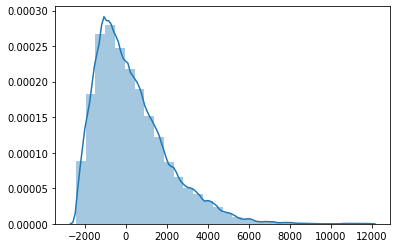

In [16]:
#51 สร้าง distribution plot ของผลต่างระหว่าง y_test กับ predicted results และอธิบายความหมาย
sns.distplot((y_test - pred), bins=30)

In [17]:
#52 สร้าง dataframe เปรียบเทียบ ยอดขายจริงกับการทำนาย
dict_compare ={'Sale':y_test.flatten(), 'Predicted':pred.flatten()}
df_compare = pd.DataFrame(dict_compare)
df_compare

,Sale,Predicted
0,3243.7776,2454.304144
1,3014.7424,2277.292437
2,2799.6890,1530.446856
3,1328.2710,1330.434880
4,6410.3224,2430.134902
...,...,...
1700,306.2680,2013.030150
1701,2656.5420,1486.882288
1702,774.9912,2303.410690
1703,492.6920,1561.853237


In [18]:
print(df_compare.to_string())

            Sale    Predicted
0      3243.7776  2454.304144
1      3014.7424  2277.292437
2      2799.6890  1530.446856
3      1328.2710  1330.434880
4      6410.3224  2430.134902
5      1211.7560  1525.481168
6       908.1512  1445.460943
7      1640.5312  1306.127320
8      2237.0880  1972.294436
9       379.5060  2278.085825
10     1846.9292  1548.600636
11     2375.5744  1967.495968
12     3691.1952  2020.524131
13      595.2252  2329.969692
14     3235.7880  1652.211964
15      516.6608  1813.820870
16     1922.8304  1595.283138
17      759.0120  1219.839064
18      656.4788  1222.737834
19     1603.9122  1976.229822
20     4362.3216  2124.222809
21     1725.7536  1641.326459
22     1037.3164  1275.087355
23      143.8128  1954.112394
24     2137.8838  2114.082881
25     2956.1520  1780.154282
26     4579.3724  2469.627582
27     1581.9408  2197.843124
28     1947.4650  2413.864552
29      424.7804  2403.376467
30     6391.6800  2089.579131
31      647.1576  1648.675708
32     285

In [19]:
#53หา Correlation จาก dataframe ข้อ 52
df_compare.corr()

,Sale,Predicted
Sale,1.000000,0.562012
Predicted,0.562012,1.000000
